##Abstract

In this lab we took bias and flat data for the Angell Hall telescope and used them to calculate the gain and read noise of the telescope. We also tested the linearity of the Angell Hall telescope's ccd by plotting the counts as a function of temperature and seeing where a linear fit to the data was no longer accurate. Finally, we measured the dark current of the Angell Hall telescope ccd and used a curve fit optimization program to estimate the energy gap and the constant A for this ccd. We found that we had a gain of approximately 2.6 and a read-noise of approximately 16.8. We also saw our ccd to be linear in the range from about 0.2 seconds to about 1 second.

##Introduction
A CCD (Charged Coupled Device)is an array of semiconductors that is sensitive to light. It is used to measure the amount of light that enters the telescope. All CCDs require amplification in order for their data to be interpreted. This amplification is know as the gain. Each CCD is built differently and each need to be calibrated individually. 

In this lab we will attempt to calibrate the CCD in the Angell Hall telescope. In order to find the gain and read-noise of the CCD we need to take bias and flat measurements using the telescope. Additionally, we need to find out when the telescope is linear and find the dark current equation. In order to calculate this we needed to take flat images at different exposure times to determine how long it takes for the CCD to become saturated and in what range the CCD has linear dependence on exposure time.

This dark current is caused by electrons being excited into the conduction band of the CCD due to thermal fluctuations. This causes us to detect larger measurements than we should if all excitation is caused by photons. So, to account for this we must calculate the dark current at different temperatures so that we may acciount for these thermal fluctuations.

##Theory

In order to properly calibrate our CCD we need to know the gain and the read-noise for our CCD. We can calculate the gain by using flat field images and bias images. The equation for the gain is

$$Gain = \frac{(F_{1} + F_{2})-(B_{1}+B_{2})}{\sigma^2_{F_{1}-F_{2}} - \sigma^2_{B{1}-B{2}}}$$

Where $F_{1}$ is the average value for the first flat frame and $F_{2}$ is the average for the second flat frame. Similarly, $B_{1}$ is the average value for the first bias image and $B_{2}$ is the average value for the second bias image. $\sigma^2_{F_{1}}$ is the variance for the first flat image and $\sigma^2_{F_{2}}$ is the variance for the second flat image. Similarly we have the variances for the bias frames.

For the read-noise we have 

$$Read Noise = \frac{Gain*\sigma_{B_{1}-B_{2}}}{\sqrt{2}}$$

The read-noise is the standard deviation from the mean value at any given pixel location. We calculated these values from data we collected for the telescope. Astronomers typically want a small read-noise and low gain.

We also needed to calculate the linearity of the CCD by taking flat frames and finding the exposure time at which the relationship between electron count and exposure time is no longer linear. So, to do this what we do is we plot the electron counts versus the exposure time of the CCD. We found that our CCD was linear in a range between about 0.2 seconds and 1 second of exposure time. 

Finally, we needed to find the dark current for the telescope. To calibrate this effect we needed to do a curve fit in order to find the band gap for our telescope and the constant A. The equation for the dark current of the telescope is given by 

$$Dark Current = AT^{3/2}e^{-E_{g}*kT}$$

A is a constant and $E_{g}$ is the difference between the fermi level and the bottom of the conduction band for the semiconductor we are using. 

##Experiment and Methodology

####In this first section of code we imported all of the packages that we will need for our lab. We also imported the bias and flat data that we collected the first time. We then created subarrays for our flats and plotted a histogram of the flats and noted that they looked approximately normal which makes us more confident in their validity.

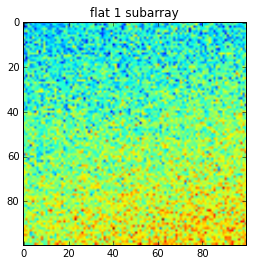

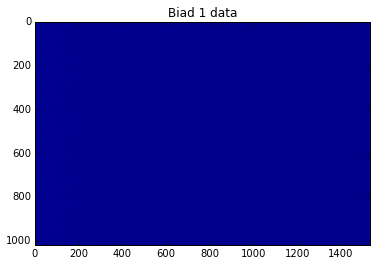

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   3.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
          2.,   0.,   0.,   0.,   2.,   2.,   0.,   0.,   2.,   3.,   1.,
          0.,   2.,   2.,   1.,   1.,   1.,   4.,   0.,   3.,   3.,   4.,
          4.,   5.,   3.,   4.,   3.,   8.,   6.,   4.,   3.,   8.,   2.,
          4.,   2.,   4.,   6.,   7.,   5.,  10.,   5.,   7.,   3.,   6.,
          9.,  12.,   5.,   4.,   4.,  15.,   7.,  17.,   7.,  12.,   5.,
         15.,   3.,  14.,   6.,  16.,  13.,   9.,  24.,  11.,  20.,  13.,
         22.,   5.,  17.,   8.,  28.,  17.,  27.,   7.,  28.,  16.,  38.,
         15.,  27.,  16.,  27.,  15., 

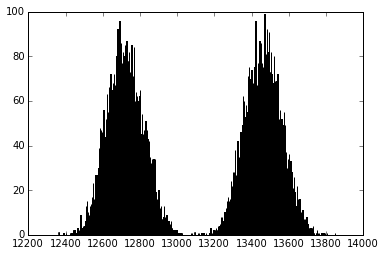

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from matplotlib import rcParams

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy import *
from scipy import optimize
from pylab import *
import numpy as np
from astropy.io import fits


data_bias_1 = fits.getdata("teamblue.00000006.NGC_6205.BIAS - Copy.FIT")
data_bias_2 = fits.getdata("teamblue.00000007.NGC_6205.BIAS - Copy.FIT")
data_flat_1 = fits.getdata("teamblue.00000040.NGC_6205.FLAT.FIT")
data_flat_2 = fits.getdata("teamblue.00000042.NGC_6205.FLAT.FIT")

sub_flat_1 = data_flat_1[200:300, 400:500]
sub_flat_2 = data_flat_2[200:300, 400:500]

plt.imshow(sub_flat_1)
plt.title('flat 1 subarray')
plt.show()
plt.imshow(data_bias_1)
plt.title('Bias 1 data')
plt.show()
#plt.plot(sub_flat_1)
plt.hist(sub_flat_1.flatten(), bins = 500)
plt.hist(sub_flat_2.flatten(), bins = 500)



  

####In this next section of code we took the average values for each of the bias frames and foudn the variance for the bias and flat images. We then printed out the mean and standard deviation for both the bias and the flat field images.

In [3]:
bias_1_mean = np.mean(data_bias_1)
bias_2_mean = np.mean(data_bias_2)
flat_1_mean = np.mean(sub_flat_1)
flat_2_mean = np.mean(sub_flat_2)

bias_std = np.std(data_bias_1 - data_bias_2)
flat_std = np.std(sub_flat_1 - sub_flat_2)
bias_var = bias_std**2
flat_var = flat_std**2
print bias_1_mean, bias_2_mean
print bias_std, flat_std


104.991 105.952
8.97003 99.4248


####In this cell we calculated the Gain and Read-Noise for our data.

In [4]:
Gain = (((flat_1_mean + flat_2_mean) - (bias_1_mean + bias_2_mean))/(flat_var - bias_var))

Read_noise = Gain*(bias_std) / np.sqrt(2)

print Gain
print Read_noise


2.6485926945
16.7994060686


####In this cell we imported our new flat frames that each had different exposure times. Additionally we created subarrays for each of them and subtracted the bias from each of the flats. We then averaged our flats and plotted the average value of each subarray versus their exposure time. We used this to determine when the CCD is linear, which we found to be for exposure times between 0.2 seconds and 1 second. Which correspond to counts between about 6000 and 35000.

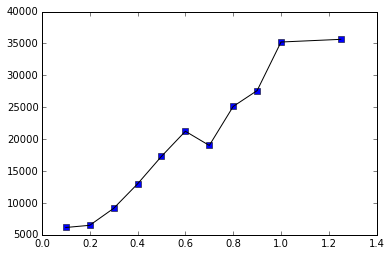

In [5]:
data_bias_new = fits.getdata("teambode/teambode.00000023.BIAS.FIT")
data_flat_new_1 = fits.getdata("teambode/teambode.00000020.FLAT..1s.FIT")
data_flat_new_2 = fits.getdata("teambode/teambode.00000036.FLAT..2s.FIT")
data_flat_new_3 = fits.getdata("teambode/teambode.00000037.FLAT..3s.FIT")
data_flat_new_4 = fits.getdata("teambode/teambode.00000038.FLAT..4s.FIT")
data_flat_new_5 = fits.getdata("teambode/teambode.00000030.FLAT..5s.FIT")
data_flat_new_6 = fits.getdata("teambode/teambode.00000039.FLAT..6s.FIT")
data_flat_new_7 = fits.getdata("teambode/teambode.00000040.FLAT..7s.FIT")
data_flat_new_8 = fits.getdata("teambode/teambode.00000041.FLAT..8s.FIT")
data_flat_new_9 = fits.getdata("teambode/teambode.00000042.FLAT..9s.FIT")
data_flat_new_10 = fits.getdata("teambode/teambode.00000033.FLAT.1s.FIT")
data_flat_new_11 = fits.getdata("teambode/Part2FLAT1.25.FIT")


data_flat_new_1 -= data_bias_new
data_flat_new_2 -= data_bias_new
data_flat_new_3 -= data_bias_new
data_flat_new_4 -= data_bias_new
data_flat_new_5 -= data_bias_new
data_flat_new_6 -= data_bias_new
data_flat_new_7 -= data_bias_new
data_flat_new_8 -= data_bias_new
data_flat_new_9 -= data_bias_new
data_flat_new_10 -= data_bias_new
data_flat_new_11 -= data_bias_new

sub_flat_new_1 = data_flat_new_1[150:250, 200:300]
sub_flat_new_2 = data_flat_new_2[150:250, 200:300]
sub_flat_new_3 = data_flat_new_3[150:250, 200:300]
sub_flat_new_4 = data_flat_new_4[50:250, 200:300]
sub_flat_new_5 = data_flat_new_5[50:250, 200:300]
sub_flat_new_6 = data_flat_new_6[50:250, 200:300]
sub_flat_new_7 = data_flat_new_7[50:250, 200:300]
sub_flat_new_8 = data_flat_new_8[50:250, 200:300]
sub_flat_new_9 = data_flat_new_9[50:250, 200:300]
sub_flat_new_10 = data_flat_new_10[150:250, 200:300]
sub_flat_new_11 = data_flat_new_11[150:250, 200:300]


sub_avg_1 = np.mean(sub_flat_new_1)
sub_avg_2 = np.mean(sub_flat_new_2)
sub_avg_3 = np.mean(sub_flat_new_3)
sub_avg_4 = np.mean(sub_flat_new_4)
sub_avg_5 = np.mean(sub_flat_new_5)
sub_avg_6 = np.mean(sub_flat_new_6)
sub_avg_7 = np.mean(sub_flat_new_7)
sub_avg_8 = np.mean(sub_flat_new_8)
sub_avg_9 = np.mean(sub_flat_new_9)
sub_avg_10 = np.mean(sub_flat_new_10)
sub_avg_11 = np.mean(sub_flat_new_11)

sub_avg_array = [sub_avg_1, sub_avg_2, sub_avg_3, sub_avg_4, sub_avg_5, sub_avg_6, sub_avg_7, sub_avg_8, sub_avg_9, sub_avg_10, sub_avg_11]

exp_time = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.25]

plt.plot(exp_time, sub_avg_array, 'bs' )
plt.plot(exp_time, sub_avg_array, 'k')


####In this cell I imported the new dark field images we took. I then created an array of the temperatures that correspond to each of these images. We took this data by taking a series of 10 dark images with the cooling fan turned off and noted the temperature of the telescope for each image. Next I subtracted off the bias from these images and created subarrays for each of them. I then took the mean of each of these dark field images and plotted these images against their temperatures. We then used a curve fitting tool built into scipy to find approximate values for the band gap and the constant A. We then plotted this curve fit against our experimentally determined data.

[  7.64583476e+15   3.30815882e-19]


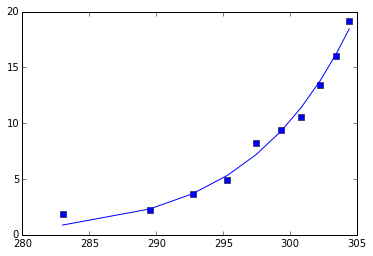

In [6]:

dark_1 = fits.getdata("squad/squad.00000075.DARK.FIT")
dark_2 = fits.getdata("squad/squad.00000076.DARK.FIT")
dark_3 = fits.getdata("squad/squad.00000077.DARK.FIT")
dark_4 = fits.getdata("squad/squad.00000078.DARK.FIT")
dark_5 = fits.getdata("squad/squad.00000079.DARK.FIT")
dark_6 = fits.getdata("squad/squad.00000080.DARK.FIT")
dark_7 = fits.getdata("squad/squad.00000081.DARK.FIT")
dark_8 = fits.getdata("squad/squad.00000082.DARK.FIT")
dark_9 = fits.getdata("squad/squad.00000083.DARK.FIT")
dark_10 = fits.getdata("squad/squad.00000084.DARK.FIT")
dark_11 = fits.getdata("squad/squad.00000085.DARK.FIT")

temp_array = [-5, -5, -0.2, 3.2, 6.2, 8.4, 10.5, 12.1, 13.5, 15.0, 15.9, 16.9]

temp_array_avg = [0, 0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]

for i in range(11):
    temp_array_avg[i] = (temp_array[i] + temp_array[i+1])/2
    
temp_array_avg.pop(1)

for i in range(10):
    temp_array_avg[i] += 288

temp = np.array(temp_array_avg)

dark_1 -= data_bias_1
dark_2 -= data_bias_1
dark_3 -= data_bias_1
dark_4 -= data_bias_1
dark_5 -= data_bias_1
dark_6 -= data_bias_1
dark_7 -= data_bias_1
dark_8 -= data_bias_1
dark_9 -= data_bias_1
dark_10 -= data_bias_1
dark_11 -= data_bias_1

    
sub_dark_1 = dark_1[200:650, 400:1050]
sub_dark_2 = dark_2[200:650, 400:1050]
sub_dark_3 = dark_3[200:650, 400:1050]
sub_dark_4 = dark_4[200:650, 400:1050]
sub_dark_5 = dark_5[200:650, 400:1050]
sub_dark_6 = dark_6[200:650, 400:1050]
sub_dark_7 = dark_7[200:650, 400:1050]
sub_dark_8 = dark_8[200:650, 400:1050]
sub_dark_9 = dark_9[200:650, 400:1050]
sub_dark_10 = dark_10[200:650, 400:1050]
sub_dark_11 = dark_11[200:650, 400:1050]

dark_avg_1 = np.mean(sub_dark_1)
dark_avg_2 = np.mean(sub_dark_2)
dark_avg_3 = np.mean(sub_dark_3)
dark_avg_4 = np.mean(sub_dark_4)
dark_avg_5 = np.mean(sub_dark_5)
dark_avg_6 = np.mean(sub_dark_6)
dark_avg_7 = np.mean(sub_dark_7)
dark_avg_8 = np.mean(sub_dark_8)
dark_avg_9 = np.mean(sub_dark_9)
dark_avg_10 = np.mean(sub_dark_10)
dark_avg_11 = np.mean(sub_dark_11)

dark_avg_array = [dark_avg_1, dark_avg_3, dark_avg_4, dark_avg_5, dark_avg_6, dark_avg_7, dark_avg_8, dark_avg_9, dark_avg_10, dark_avg_11, ]
dark_avg_array = np.array(dark_avg_array) + 2

plt.plot(temp_array_avg, dark_avg_array, 'bs')

k = 1.38e-23
E_guess = 1.79e-19
Amp = 1 * 10e7

def funct(T, A, E_g):
    y = A*(T**(3/2))*np.exp((-E_g)/(2*k*T))
    return y
    
    
popt, pcov = optimize.curve_fit(funct, temp, dark_avg_array, p0=[Amp, E_guess])

print popt


plt.plot(temp, funct(temp, popt[0], popt[1]))



##Summary

In this lab we calculated the Gain, Read-Noise, linearity and Dark Current for the Angell Hall CCD. We used standard techniques to find the Gain and Read-Noise of the CCD. These techniques worked well for our CCD. We used data we collected for this CCD to calculate the Gain and Read-Noise. This allowed us to find values that can be used in the future when we use the telescope.

We also learned from this lab how to use the Angell Hall telescope to collect data. We used the telescope to take flat frame images, bias images and dark images. These were then used to calibrate the telescope. This lab will be very helpful for anyone who wishes to go into the field of astronomy and use telescopes to take data and do real scientific research.

##Conclusion

We found from our experiment that the Angell Hall CCD has a gain of approximately 2.65 and a Read-Noise of approximately 16.8. We also found that the CCD is linear in the range of counts between about 6000 and 35000. These values can be used to determine how long we should observe different astronomical objects with this telescope. Finally, we found the values of A and $E_{g}$ for the dark current equation. This along with the other data we collected can be used as a calibration for the Angell Hall telescope CCD. $A = 7.65 * 10^{15}$ and $E_{g} = 3.3 * 10^{-19}$